<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data loading</a></span><ul class="toc-item"><li><span><a href="#CMAM" data-toc-modified-id="CMAM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>CMAM</a></span></li><li><span><a href="#JRA55" data-toc-modified-id="JRA55-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>JRA55</a></span></li><li><span><a href="#Merra2" data-toc-modified-id="Merra2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Merra2</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Fig.-5" data-toc-modified-id="Fig.-5-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fig. 5</a></span><ul class="toc-item"><li><span><a href="#With-zoom-in-subplot" data-toc-modified-id="With-zoom-in-subplot-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>With zoom-in subplot</a></span></li><li><span><a href="#Broken-axes" data-toc-modified-id="Broken-axes-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Broken axes</a></span><ul class="toc-item"><li><span><a href="#Using-brokenaxes-package" data-toc-modified-id="Using-brokenaxes-package-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Using brokenaxes package</a></span></li></ul></li><li><span><a href="#Original" data-toc-modified-id="Original-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Original</a></span></li></ul></li><li><span><a href="#Fig.-S3" data-toc-modified-id="Fig.-S3-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fig. S3</a></span></li></ul></li></ul></div>

# Import libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [2]:
%reload_ext watermark
%watermark --iversions -v -m

xarray 0.15.1
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-112-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Data loading

## CMAM

In [3]:
inpath = f''
ds_ogwd_clim = xr.open_dataarray(f'{inpath}CMAM_OGWD_climatology@70hPa_198001-201012.nc')

In [4]:
ds_nogwd_clim = xr.open_dataarray(f'{inpath}CMAM_NOGWD_climatology@70hPa_198001-201012.nc')

## JRA55

In [5]:
ds_jra55_ses = xr.open_dataarray(f'{inpath}JRA55_GWD_climatology@70hPa_198001-201012.nc')
ds_jra55_ses = ds_jra55_ses.rename({'latitude': 'lat'})

## Merra2

In [6]:
ds_merra2_ses = xr.open_dataset(f'{inpath}MERRA2_GWD_climatology@70hPa_198001-201012.nc')

# Visualization

In [7]:
plt.rcParams.update({'font.size': 18})

## Fig. 5

### With zoom-in subplot

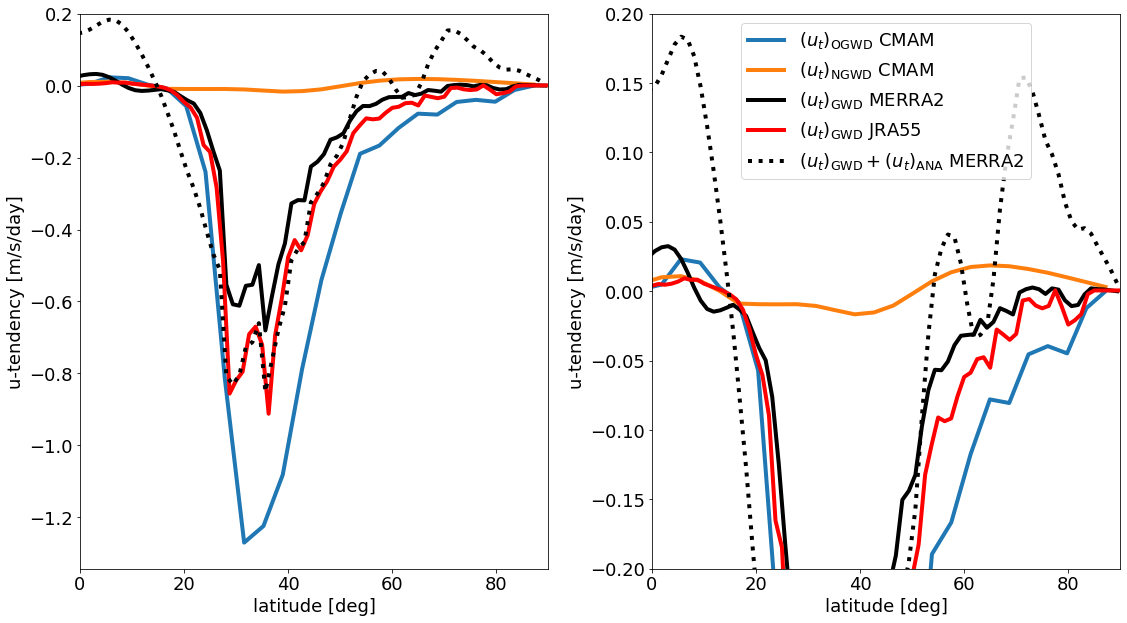

In [84]:
sel_dict = dict(month = 1)
lw = 4

fig, axes = plt.subplots(ncols=2, figsize = (16,9))
ax1 = axes[0]
plot_kwargs = dict(lw = lw, ax = ax1)

p = (ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, \
                                                label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM', ax = ax1)
plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)


ax1.set_ylabel('u-tendency [m/s/day]')
#ax1.legend(loc = 'lower right')#, bbox_to_anchor=(1.2, 0.))
ax1.set_xlabel('latitude [deg]')
ax1.set_xlim(0,90)
ax1.set_title('')
ax1.set_ylim(top=0.2)
#ax1.text(.9, .1, '(a)', transform=ax1.transAxes, ha="left", va="top", fontsize = 28)

ax2 = axes[1]
plot_kwargs = dict(lw = lw, ax = ax2)
(ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, \
                                                label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM', ax = ax2)
plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)

ax2.set_xlim(0,90)
ax2.set_ylim(-0.2,0.2)
ax2.set_ylabel('u-tendency [m/s/day]')
ax2.set_xlabel('latitude [deg]')
ax2.legend(loc = 'upper center')
ax2.set_title('')
#ax2.text(.9, .1, '(b)', transform=ax2.transAxes, ha="left", va="top", fontsize = 28)
plt.tight_layout()
plt.savefig('tendency_comparison_zoomin.pdf', bbox_inches='tight')

### Broken axes

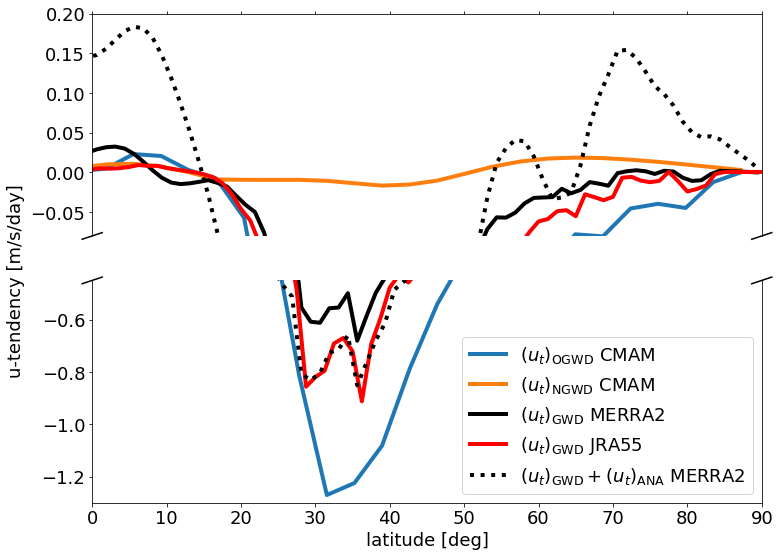

In [144]:
sel_dict = dict(month = 1)
lw = 4

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize = (12,9))
plot_kwargs = dict(lw = lw, ax = ax)

p = (ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, ax = ax, label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM')
(ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, ax = ax2, label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM')

# ax
plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)

#ax2
plot_kwargs = dict(lw = lw, ax = ax2)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)


ax.set_xlim(0,90)
ax.set_ylim(-0.08, 0.2)  # most of the data
ax.set_xlabel('')
ax.set_title('')

ax2.set_ylim(-1.3,-0.45)  # outliers only
ax2.set_xlabel('latitude [deg]')
ax2.set_title('')
ax2.legend(loc = 'lower right')
ax.set_ylabel('u-tendency [m/s/day]')
ax.yaxis.set_label_coords(-0.1, -0.2)




ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 
                                                                                   


#plt.savefig('tendency_comparison_new.pdf', bbox_inches='tight')

#### Using brokenaxes package

In [107]:
from brokenaxes import brokenaxes

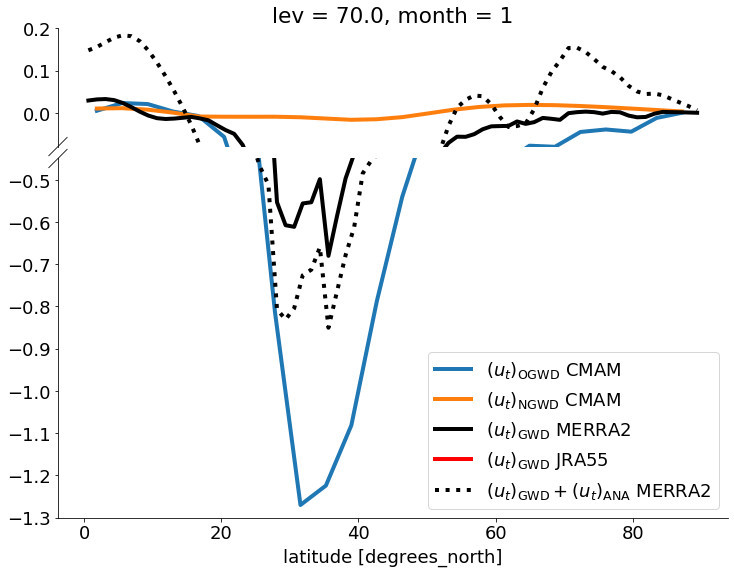

In [132]:
sel_dict = dict(month = 1, lat = slice(0,90))
lw = 4

fig = plt.figure(figsize=(12,9))
bax = brokenaxes(ylims=((-1.3, -0.45), (-0.08, 0.2)), hspace=.05)
plot_kwargs = dict(lw = lw, ax = bax)

(ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, ax = bax, label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM')

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)

bax.legend(loc = 'lower right')


### Original

Text(0.5, 0, 'latitude [deg]')

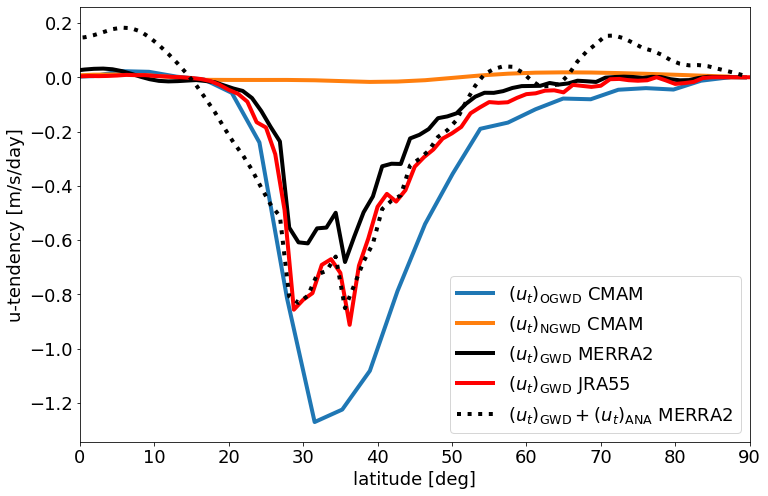

In [9]:
sel_dict = dict(month = 1)
lw = 4
plot_kwargs = dict(lw = lw)

p = (ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, size = 8, label = r'$(u_{t})_{\mathrm{OGWD}}$ CMAM')


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$ CMAM'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ MERRA2'
plot_kwargs['color'] = 'k'
(ds_merra2_ses['DUDTGWD'].sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}$ JRA55'
plot_kwargs['color'] = 'red'
(ds_jra55_ses.sel(**sel_dict)).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{GWD}}+(u_{t})_{\mathrm{ANA}}$ MERRA2'
plot_kwargs['color'] = 'k'
plot_kwargs['linestyle'] = ':'
((ds_merra2_ses['DUDTGWD']+ds_merra2_ses['DUDTANA']).sel(**sel_dict)*24*3600).plot(**plot_kwargs)



plt.xlim(0,90)
plt.title('')
plt.ylabel('u-tendency [m/s/day]')
plt.legend(loc = 'lower right')
plt.xlabel('latitude [deg]')

#plt.savefig('tendency_comparison_new.pdf', bbox_inches='tight')

## Fig. S3

In [10]:
inpath = f'/mnt/4data/CMAM/0A.daily/'
ds_dudt_clim = xr.open_dataset(f'{inpath}dzmuadt_198001-201012_clim@70hPa.nc')['dzmuadt']
ds_pure_clim = xr.open_dataset(f'{inpath}TEM-res-pure-new_198001-201012_clim@70hPa.nc')['TEM-res-pure-new']
ds3_clim = xr.open_dataset(f'{inpath}TEM-res3-new_198001-201012_clim@70hPa.nc')['TEM-res3-new']
ds_epfd2_clim = xr.open_dataset(f'{inpath}acceldiv-calc_198001-201012_clim@70hPa.nc')['acceldiv-calc']

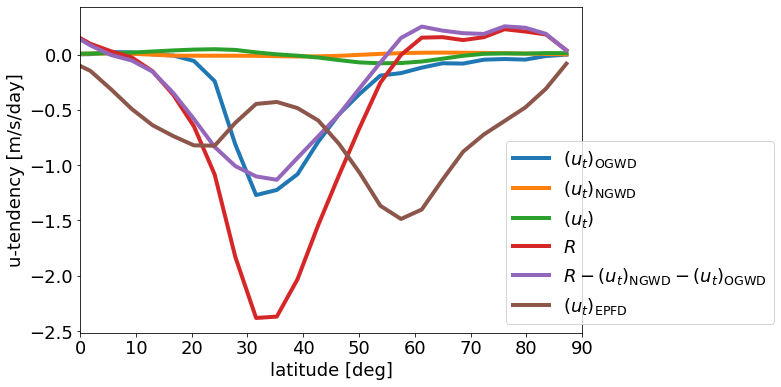

In [16]:
lw = 4
sel_dict = dict(month = 1)

p = (ds_ogwd_clim.sel(**sel_dict)*24*3600).plot(lw = lw, size = 6, label = r'$(u_{t})_{\mathrm{OGWD}}$')

plot_kwargs = dict(lw = lw)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{NGWD}}$'
(ds_nogwd_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})}$'
(ds_dudt_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$R$' #'$(u_{t})_{\mathrm{EPFD}}}$'
(ds_pure_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$R-(u_{t})_{\mathrm{NGWD}}-(u_{t})_{\mathrm{OGWD}}$' #'$(u_{t})_{\mathrm{EPFD}}}$'
(ds3_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)

plot_kwargs['label'] = r'$(u_{t})_{\mathrm{EPFD}}}$'
(ds_epfd2_clim.sel(**sel_dict)*24*3600).plot(**plot_kwargs)


plt.title('')
plt.ylabel('u-tendency [m/s/day]')
plt.legend(loc = 'lower right', bbox_to_anchor = (1.4,0.))#loc = 8)
plt.xlabel('latitude [deg]')
plt.xlim(0,90)
plt.savefig('CMAM_january_climatological_comparison_origGWD_vs_GWDfromTEM_new2.pdf', bbox_inches='tight')